In [45]:
# Loading the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# setting an initial style
plt.style.use('ggplot')

# Loading the dataset
asd = pd.read_csv("C:/Users/Ahmad/Desktop/Python/MLPractice/omdena-sl-autism/asd_omdena_data_csv.csv")
asd.head()

,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,0,0,0,0,0,0,1,1,0,...,Yes,Yes,1,Yes,F,middle eastern,Yes,No,Family Member,No
1,2,1,1,0,0,0,1,1,0,0,...,Yes,Yes,2,Yes,M,White European,Yes,No,Family Member,Yes
2,3,1,0,0,0,0,0,1,1,0,...,Yes,Yes,4,Yes,M,Middle Eastern,Yes,No,Family Member,Yes
3,4,1,1,1,1,1,1,1,1,1,...,Yes,Yes,2,Yes,M,Hispanic,No,No,Family Member,Yes
4,5,1,1,0,1,1,1,1,1,1,...,Yes,Yes,1,Yes,F,White European,No,No,Family Member,Yes


### Data Cleaning and Validation

In [46]:
asd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 28 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   CASE_NO_PATIENT'S                                   1985 non-null   int64  
 1   A1                                                  1985 non-null   int64  
 2   A2                                                  1985 non-null   int64  
 3   A3                                                  1985 non-null   int64  
 4   A4                                                  1985 non-null   int64  
 5   A5                                                  1985 non-null   int64  
 6   A6                                                  1985 non-null   int64  
 7   A7                                                  1985 non-null   int64  
 8   A8                                                  1985 non-null   int64  
 9

In [47]:
asd.columns

Index(['CASE_NO_PATIENT'S', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
       'A9', 'A10_Autism_Spectrum_Quotient', 'Social_Responsiveness_Scale',
       'Age_Years', 'Qchat_10_Score', 'Speech Delay/Language Disorder',
       'Learning disorder', 'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Childhood Autism Rating Scale',
       'Anxiety_disorder', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who_completed_the_test', 'ASD_traits'],
      dtype='object')

In [48]:
asd.describe().T

,count,mean,std,min,25%,50%,75%,max
CASE_NO_PATIENT'S,1985.0,993.000000,573.164462,1.0,497.0,993.0,1489.0,1985.0
A1,1985.0,0.299244,0.458042,0.0,0.0,0.0,1.0,1.0
A2,1985.0,0.238287,0.426143,0.0,0.0,0.0,0.0,1.0
A3,1985.0,0.213098,0.409600,0.0,0.0,0.0,0.0,1.0
A4,1985.0,0.272040,0.445123,0.0,0.0,0.0,1.0,1.0
A5,1985.0,0.278589,0.448418,0.0,0.0,0.0,1.0,1.0
A6,1985.0,0.306297,0.461071,0.0,0.0,0.0,1.0,1.0
A7,1985.0,0.345088,0.475517,0.0,0.0,0.0,1.0,1.0
A8,1985.0,0.243829,0.429499,0.0,0.0,0.0,0.0,1.0
A9,1985.0,0.259950,0.438717,0.0,0.0,0.0,1.0,1.0


In [49]:
# Checking for duplication
asd.duplicated().value_counts()

# Checking for missing values
asd.isna().sum()

CASE_NO_PATIENT'S                                      0
A1                                                     0
A2                                                     0
A3                                                     0
A4                                                     0
A5                                                     0
A6                                                     0
A7                                                     0
A8                                                     0
A9                                                     0
A10_Autism_Spectrum_Quotient                           0
Social_Responsiveness_Scale                            9
Age_Years                                              0
Qchat_10_Score                                        39
Speech Delay/Language Disorder                         0
Learning disorder                                      0
Genetic_Disorders                                      0
Depression                     

In [50]:
# Understanding the missing values in the column
asd[asd.Qchat_10_Score.isna()].head()

,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
1055,1056,0,0,0,0,0,0,0,0,0,...,No,No,1,No,M,Asian,Yes,Yes,Health Care Professional,Yes
1065,1066,0,0,0,0,0,0,0,0,0,...,No,No,1,No,M,Asian,Yes,Yes,Family Member,Yes
1075,1076,0,0,0,0,0,0,0,0,0,...,No,No,1,No,M,Asian,Yes,Yes,Family Member,Yes
1085,1086,0,0,0,0,0,0,0,0,0,...,No,No,1,No,M,Asian,Yes,Yes,Family Member,Yes
1095,1096,0,0,0,0,0,0,0,0,0,...,No,No,1,No,M,Asian,Yes,Yes,Health Care Professional,Yes


We can see that the 10-Item Autism Spectrum QChat was not filled for rows where the Qchat_10_Score contained missing item, so I can drop the columns. Also, for other missing columns the no of rows seems inconsequential, and given the nature of the dataset, I will be dropping them.

In [51]:
# What percentage of the data is missing
asd.isna().sum()/len(asd) * 100

CASE_NO_PATIENT'S                                     0.000000
A1                                                    0.000000
A2                                                    0.000000
A3                                                    0.000000
A4                                                    0.000000
A5                                                    0.000000
A6                                                    0.000000
A7                                                    0.000000
A8                                                    0.000000
A9                                                    0.000000
A10_Autism_Spectrum_Quotient                          0.000000
Social_Responsiveness_Scale                           0.453401
Age_Years                                             0.000000
Qchat_10_Score                                        1.964736
Speech Delay/Language Disorder                        0.000000
Learning disorder                                     0

In [52]:
# Dropping the missng values
asd = asd.dropna(subset=['Social_Responsiveness_Scale', 'Depression', 'Qchat_10_Score', 'Social/Behavioural Issues'])
asd.shape

(1923, 28)

In [53]:
# Who completed the test?
asd.Who_completed_the_test.value_counts()

Health Care Professional    1197
Family Member                643
Family member                 58
School and NGO                18
Self                           4
Others                         3
Name: Who_completed_the_test, dtype: int64

In [61]:
# Remapping the variables to clean the column
asd["Who_completed_the_test"] = asd["Who_completed_the_test"].map({'Family member': 'Family Member',
                                                                 'Family Member': 'Family Member',
                                                                 'Health Care Professional': 'Health Care Professional',
                                                                 'Health care professional': 'Health Care Professional',
                                                                 'Self': 'Others',
                                                                 'Others': 'Others'})
asd.Who_completed_the_test.value_counts()                                                                 


Health Care Professional    1197
Family Member                701
Others                         7
Name: Who_completed_the_test, dtype: int64

### Exploratory Data Analysis

#### Univariate Analysis

QChat_10_Score column seems to be cummulative score of the A1 to A10, let's see it's distribution.

<AxesSubplot:xlabel='Qchat_10_Score'>

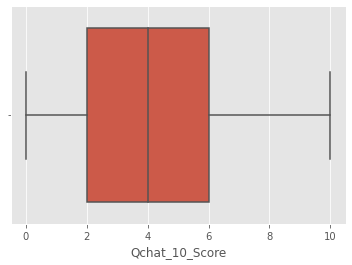

In [55]:
sns.boxplot(data=asd, x='Qchat_10_Score')

<AxesSubplot:xlabel='Age_Years', ylabel='count'>

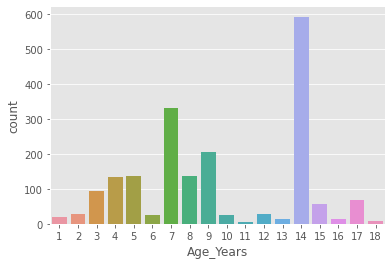

In [56]:
# Check the age distribution since we are interested in toddlers
sns.countplot(data=asd, x='Age_Years')

[Text(0.5, 1.0, 'Ethnicity distribution')]

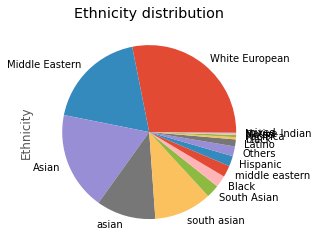

In [57]:
# Ethnicity in the data
asd.Ethnicity.value_counts().plot(kind='pie').set(title= 'Ethnicity distribution')

([<matplotlib.patches.Wedge at 0x1e95e93e110>,
 [Text(-0.4316124998266185, 1.0117858716118828, 'Health Care Professional'),
  Text(0.419903952515597, -1.0167008757062126, 'Family Member'),
  Text(1.0999267047118233, -0.012698199155387037, 'Others')])

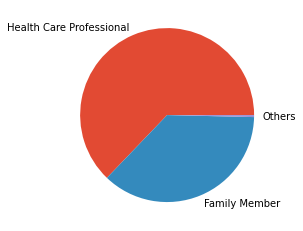

In [58]:
# We may also be interested in who completed the chat/test
data = asd.Who_completed_the_test.value_counts()
explode = (0.1, 0.0)
plt.pie(data, labels=data.index)

<AxesSubplot:xlabel='Family_mem_with_ASD', ylabel='count'>

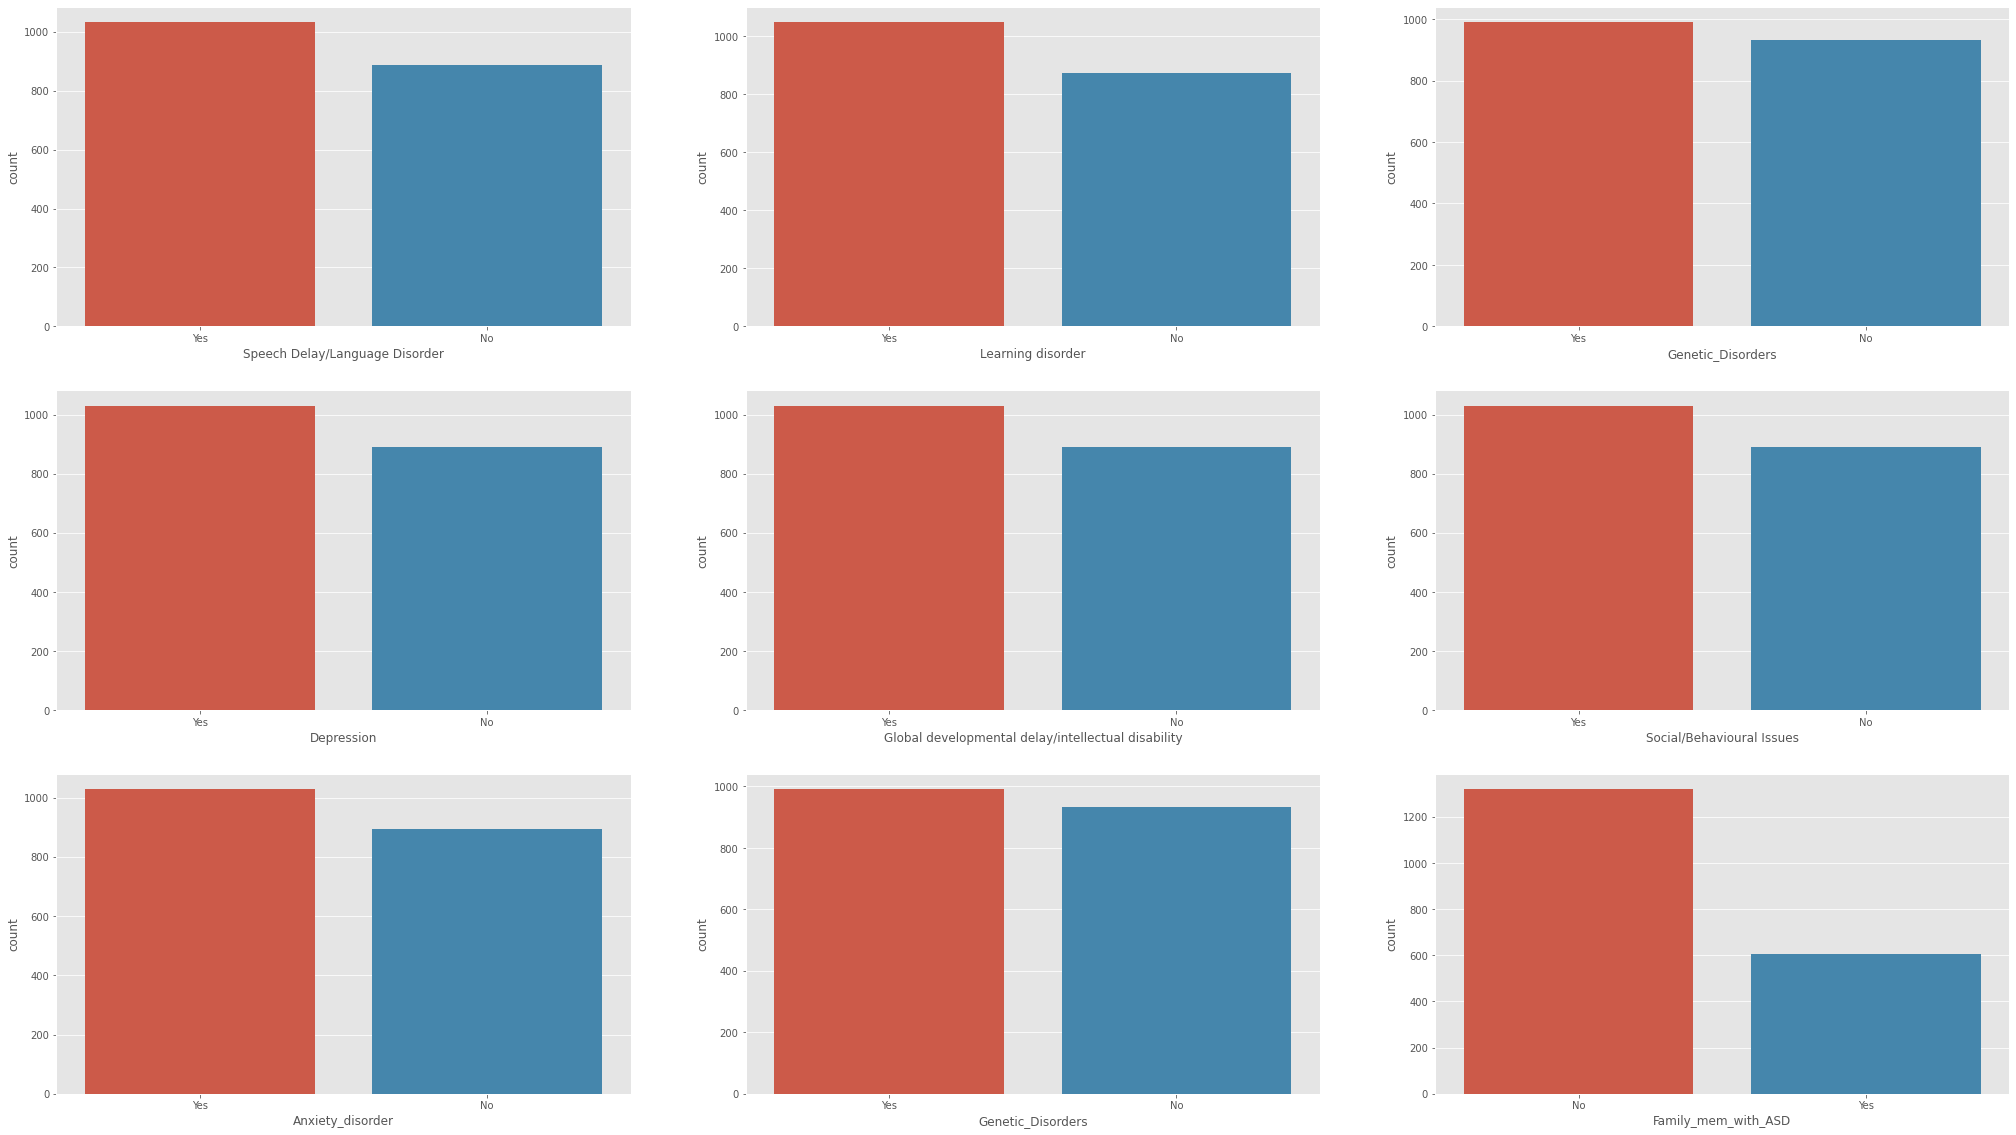

In [59]:
# There are a number of disorders/unique features highlighted in, lets check their distribution
fig, axes = plt.subplots(3,3, figsize=(35,20))

sns.countplot(data=asd, x='Speech Delay/Language Disorder', ax=axes[0,0])
sns.countplot(data=asd, x='Learning disorder', ax=axes[0,1])
sns.countplot(data=asd, x='Genetic_Disorders', ax=axes[0,2])
sns.countplot(data=asd, x='Depression', ax=axes[1,0])
sns.countplot(data=asd, x='Global developmental delay/intellectual disability', ax=axes[1,1])
sns.countplot(data=asd, x='Social/Behavioural Issues', ax=axes[1,2])
sns.countplot(data=asd, x='Anxiety_disorder', ax=axes[2,0])
sns.countplot(data=asd, x='Genetic_Disorders', ax=axes[2,1])
sns.countplot(data=asd, x='Family_mem_with_ASD', ax=axes[2,2])

<AxesSubplot:xlabel='ASD_traits', ylabel='count'>

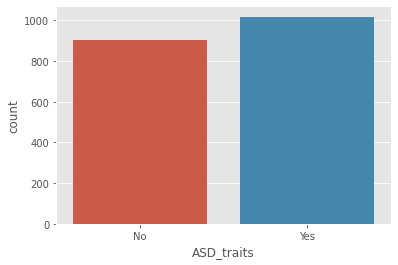

In [60]:
# Checking the distribution of the target variable "ASD Traits"
sns.countplot(data=asd, x='ASD_traits')

#### Bivariate Analysis